In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##  Reading + Exploring Data.

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.shape

(2240, 29)

## Data Cleaning + Preprocessing.

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
income_mean = df.groupby('Education')['Income'].mean()

df['Income'] = df['Income'].fillna(df['Education'].map(income_mean))

In [7]:
df['Education'].map(income_mean)

0       52720.373656
1       52720.373656
2       52720.373656
3       52720.373656
4       56145.313929
            ...     
2235    52720.373656
2236    56145.313929
2237    52720.373656
2238    52917.534247
2239    56145.313929
Name: Education, Length: 2240, dtype: float64

In [8]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Feature Engineering : 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
from datetime import datetime

In [13]:
df.drop(columns=['Recency'], inplace=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
max_date = df['Dt_Customer'].max()
df['Days_since_enrolment'] = df['Dt_Customer'].apply(lambda x: (max_date - x).days)
df['Age'] = datetime.now().year - df['Year_Birth']


df['Total Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['Prob_wines'] = df['MntWines'] / df['Total Spending']
df['Prob_fruits'] = df['MntFruits'] / df['Total Spending']
df['Prob_meatproducts'] = df['MntMeatProducts'] / df['Total Spending']
df['Prob_fishproducts'] = df['MntFishProducts'] / df['Total Spending']
df['Prob_sweetproducts'] = df['MntSweetProducts'] / df['Total Spending']
df['Prop_goldprods']=df['MntGoldProds'] / df['Total Spending']


df['Offers_Responded_To'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

df['Total Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Year_Birth','Response', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases','Year_Birth','Dt_Customer','ID'], inplace=True)


In [14]:
df.describe()

,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52253.592375,0.444196,0.506250,5.316518,0.009375,353.582143,54.194196,605.798214,0.458481,0.049505,0.249508,0.071532,0.050777,0.120196,0.446875,14.862054
std,25039.085601,0.538398,0.544538,2.426645,0.096391,202.122512,11.984069,602.249288,0.228411,0.055867,0.126633,0.077909,0.061184,0.108988,0.890543,7.677173
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,0.000000,0.000000,3.000000,0.000000,180.750000,46.000000,68.750000,0.289506,0.008924,0.156250,0.012571,0.008621,0.038095,0.000000,8.000000
50%,51609.500000,0.000000,0.000000,6.000000,0.000000,355.500000,53.000000,396.000000,0.457482,0.029840,0.233447,0.048193,0.033333,0.086294,0.000000,15.000000
75%,68289.750000,1.000000,1.000000,7.000000,0.000000,529.000000,64.000000,1045.500000,0.639143,0.070237,0.328227,0.104703,0.070411,0.169768,1.000000,21.000000
max,666666.000000,2.000000,2.000000,20.000000,1.000000,699.000000,130.000000,2525.000000,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150,5.000000,44.000000


We will apply outlier detection techniques to refine our data. For 'Age', we'll consider removing entries with unusually high values, such as those over 130 years. Similarly, we'll address outliers in the 'Income' and Total Purchases columns.

In [15]:

columns = ['Income', 'Age','Total Purchases']
for column in columns:
  Q1 = df[column].quantile(0.2)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1 
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound) ]


In [16]:
df.shape

(2228, 18)

In [17]:
df.describe()

,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases
count,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000
mean,51657.275548,0.444345,0.507630,5.336176,0.008977,353.694345,54.115799,605.036355,0.459575,0.049446,0.248345,0.071483,0.050863,0.120287,0.448833,14.856373
std,20581.304006,0.538629,0.544751,2.413776,0.094340,202.256006,11.708097,600.694540,0.227800,0.055748,0.123039,0.077829,0.061212,0.108981,0.892308,7.600547
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35434.750000,0.000000,0.000000,3.000000,0.000000,180.750000,46.000000,69.000000,0.290575,0.008976,0.156250,0.012578,0.008644,0.038122,0.000000,8.000000
50%,51523.500000,0.000000,0.000000,6.000000,0.000000,355.500000,53.000000,396.500000,0.458224,0.029851,0.233333,0.048193,0.033475,0.085941,0.000000,15.000000
75%,68118.000000,1.000000,1.000000,7.000000,0.000000,529.000000,64.000000,1043.250000,0.639765,0.070080,0.328149,0.103809,0.070719,0.169912,1.000000,21.000000
max,113734.000000,2.000000,2.000000,20.000000,1.000000,699.000000,83.000000,2525.000000,0.963303,0.445545,0.957117,0.590909,0.945848,0.894150,5.000000,39.000000


### Categorizing the Age Column: 

In [18]:
bins = list(range(0, 100, 10))

labels = ['0-10','11-20','21-30','31-40','41-50', '51-60', '61-70', '71-80', '81-90']

df['Age_group'] = pd.cut(df['Age'], bins, labels=labels)

In [19]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases,Age_group
0,Graduation,Single,58138.0,0,0,7,0,663,66,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1,25,61-70
1,Graduation,Single,46344.0,1,1,5,0,113,69,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,6,61-70
2,Graduation,Together,71613.0,0,0,4,0,312,58,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,21,51-60
3,Graduation,Together,26646.0,1,0,6,0,139,39,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,8,31-40
4,PhD,Married,58293.0,1,0,5,0,161,42,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,19,41-50


In [20]:
df.describe()

,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases
count,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000
mean,51657.275548,0.444345,0.507630,5.336176,0.008977,353.694345,54.115799,605.036355,0.459575,0.049446,0.248345,0.071483,0.050863,0.120287,0.448833,14.856373
std,20581.304006,0.538629,0.544751,2.413776,0.094340,202.256006,11.708097,600.694540,0.227800,0.055748,0.123039,0.077829,0.061212,0.108981,0.892308,7.600547
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35434.750000,0.000000,0.000000,3.000000,0.000000,180.750000,46.000000,69.000000,0.290575,0.008976,0.156250,0.012578,0.008644,0.038122,0.000000,8.000000
50%,51523.500000,0.000000,0.000000,6.000000,0.000000,355.500000,53.000000,396.500000,0.458224,0.029851,0.233333,0.048193,0.033475,0.085941,0.000000,15.000000
75%,68118.000000,1.000000,1.000000,7.000000,0.000000,529.000000,64.000000,1043.250000,0.639765,0.070080,0.328149,0.103809,0.070719,0.169912,1.000000,21.000000
max,113734.000000,2.000000,2.000000,20.000000,1.000000,699.000000,83.000000,2525.000000,0.963303,0.445545,0.957117,0.590909,0.945848,0.894150,5.000000,39.000000


In [21]:
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [22]:
age_group = df['Age_group'].value_counts().reset_index()

age_group


,Age_group,count
0,51-60,619
1,41-50,613
2,61-70,465
3,31-40,286
4,71-80,228
5,21-30,15
6,81-90,2
7,0-10,0
8,11-20,0


In [23]:
px.bar(age_group, x = 'Age_group', y='count')

The bar chart shows a substantial portion of customers within the age group of over 31 years.so Consequently, our focus will be directed towards the five age groups surpassing 30 years. 

In [24]:
customers_age_ms_group = df.groupby(["Age_group", "Marital_Status"]).size()\
                                                                .reset_index(name="Count")

target_age_groups = ["31-40", "41-50", "51-60", "61-70", "71-80"]

fig = px.bar(customers_age_ms_group.loc[customers_age_ms_group.Age_group.isin(target_age_groups), :], 
             x="Age_group", y="Count", color="Marital_Status", barmode="group")
fig.show()

The bar chart shows a strong presence of married individuals across all age groups. It's also important to mention that there is a significant portion of the population who are single or in non-marital relationships. On the other hand, a smaller percentage of the dataset consists of individuals who are divorced or widowed.

In [25]:
import plotly.graph_objects as go

avg_childrenhome = df.groupby(["Age_group"]).agg({"Kidhome":np.mean, "Teenhome":np.mean}).reset_index()


# Create the bar traces
def bar_avg_children(data, col, name):
    data_copy = data.copy().loc[data.Age_group.isin(target_age_groups)]
    
    children_trace = go.Bar(
        x=data_copy.Age_group,
        y=data_copy[col],
        name=name
    )
    
    return children_trace

kidhome_trace = bar_avg_children(avg_childrenhome, "Kidhome", "Average Num Of Kids per Household") 
teenhome_trace = bar_avg_children(avg_childrenhome, "Teenhome", "Average Num Of Teens per Household") 

# Create the layout
layout = go.Layout(
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Number of Children')
)

# Create the figure
fig = go.Figure(data=[kidhome_trace, teenhome_trace], layout=layout)


fig.show()


The bar graph demonstrates that individuals aged 51 and above typically have teenagers living in their households. Conversely, younger individuals are more inclined to have children under the age of 13 residing with them.

In [26]:
fig = px.histogram(df.Income, marginal='box', nbins= 100)

fig.update_layout(xaxis_range=[0,120_000])
fig.show()

The data seems to be fairly balanced without a strong skew in any particular direction, displaying a relatively symmetric distribution.

In [27]:
fig = px.histogram(df,x='Marital_Status', title='Distribution of Education')
fig.show()

Most customers tend to be married.

In [28]:
customers_age_ms_group = df.groupby(["Age_group", "Education"]).size()\
                                                                .reset_index(name="Count")


fig = px.bar(customers_age_ms_group.loc[customers_age_ms_group.Age_group.isin(target_age_groups), :], 
             x="Age_group", y="Count", color="Education", barmode="group")
fig.show()


The bar graph indicates that a majority of individuals in the five age groups have completed their education, with only a small number having basic education. Additionally, it highlights that as individuals grow older, there is an increasing trend towards attaining a PHD level of education.

In [29]:
fig = px.histogram(df, x='Income', color='Education')
fig.show()

In [30]:
fig = px.histogram(df, x='Income', facet_col='Education')
fig.show()

The analysis shows that individuals with a graduate degree generally have higher income. However, there is a noteworthy similarity in income distribution between PHD and master's degree holders. It's important to note that the representation of these educational levels varies, and also depends on individual educational achievements.

In [31]:
prod_columns = ['Prob_wines', 'Prob_fruits', 'Prob_meatproducts',
       'Prob_fishproducts', 'Prob_sweetproducts', 'Prop_goldprods']

In [32]:
import plotly.subplots as sp

In [33]:
vv_columns = {"variable": "Product Type", "value": "Purchases"}



percentage_of_purchased_products_per_category = pd.melt(df.loc[:, prod_columns]).rename(vv_columns, axis=1).groupby("Product Type").median().sort_values(by="Purchases", ascending=False) 
                                                

fig = px.bar(percentage_of_purchased_products_per_category)
fig.show()


It's evident that wine products hold the top-selling position.

<Axes: >

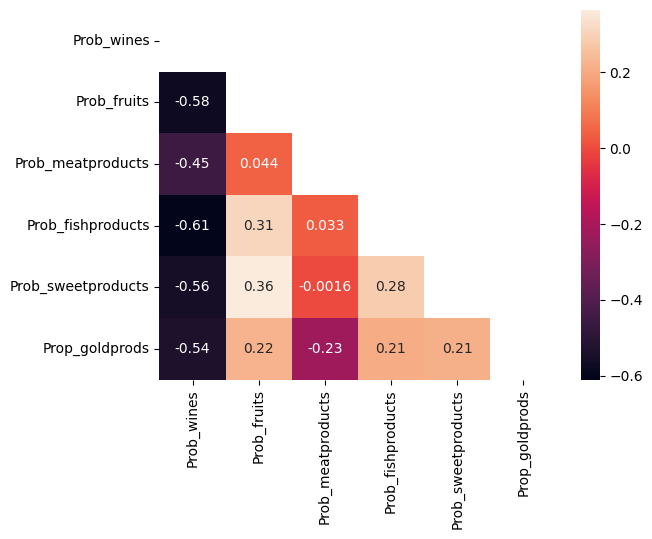

In [34]:
corr = df[prod_columns].corr()
mask = np.triu(np.ones_like(df[prod_columns].corr(), dtype=bool))
sns.heatmap(corr, annot=True, mask = mask)

Certain combinations of purchases, such as fruits and sweets or fruits and fish, exhibit a higher level of correlation compared to other pairings.

<Axes: ylabel='count'>

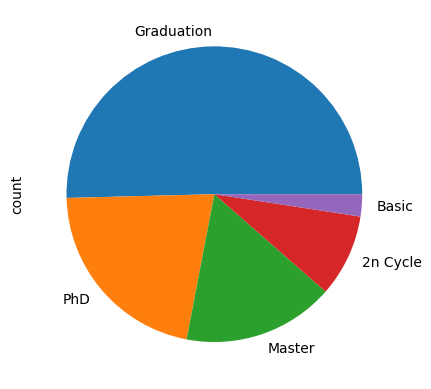

In [35]:
df['Education'].value_counts().plot(kind='pie')

The majority of customers hold graduate, PHD, and master's degrees.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2228 non-null   object  
 1   Marital_Status        2228 non-null   object  
 2   Income                2228 non-null   float64 
 3   Kidhome               2228 non-null   int64   
 4   Teenhome              2228 non-null   int64   
 5   NumWebVisitsMonth     2228 non-null   int64   
 6   Complain              2228 non-null   int64   
 7   Days_since_enrolment  2228 non-null   int64   
 8   Age                   2228 non-null   int64   
 9   Total Spending        2228 non-null   int64   
 10  Prob_wines            2228 non-null   float64 
 11  Prob_fruits           2228 non-null   float64 
 12  Prob_meatproducts     2228 non-null   float64 
 13  Prob_fishproducts     2228 non-null   float64 
 14  Prob_sweetproducts    2228 non-null   float64 
 15  Prop_gold

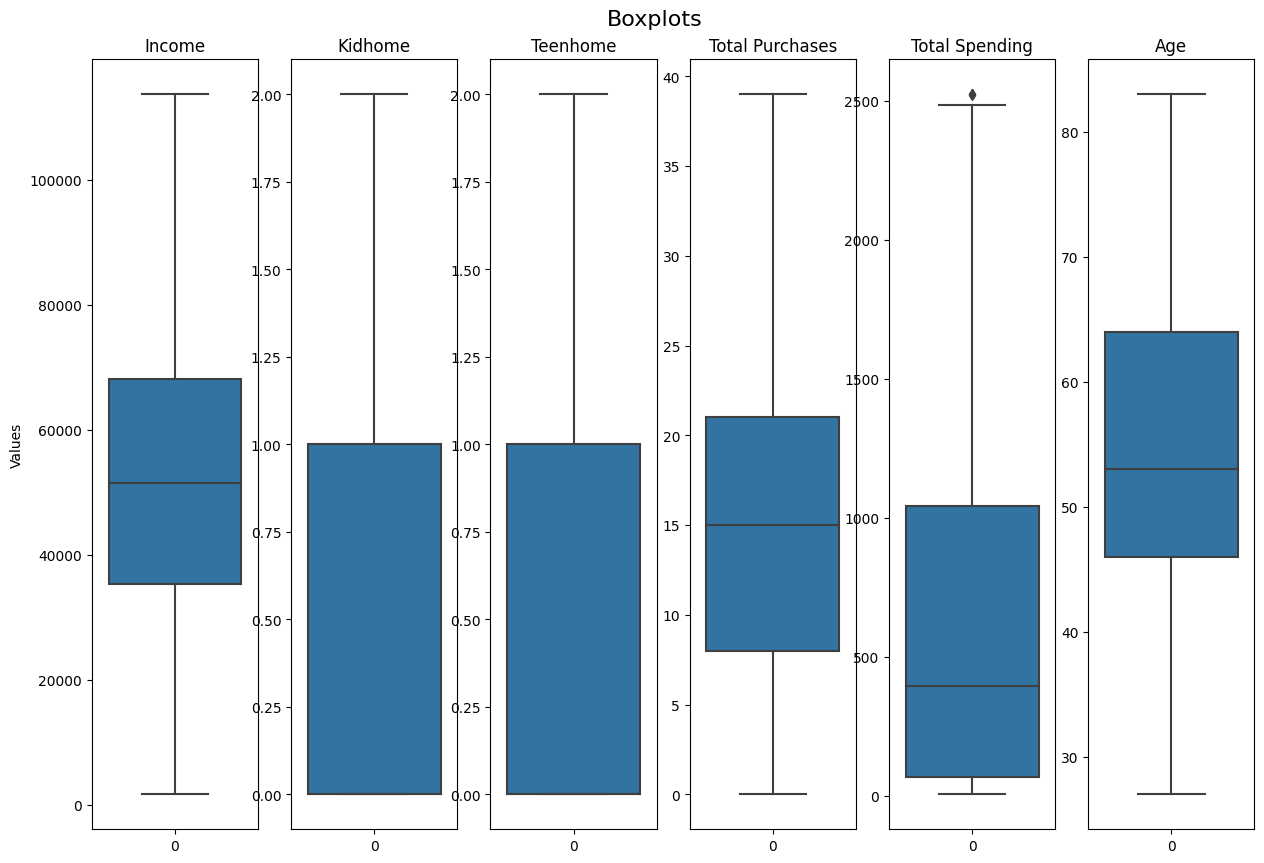

In [37]:
numeric_columns = ['Income', 'Kidhome','Teenhome','Total Purchases','Total Spending','Age']


def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(15,10)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=1, cols=6, suptitle='Boxplots')

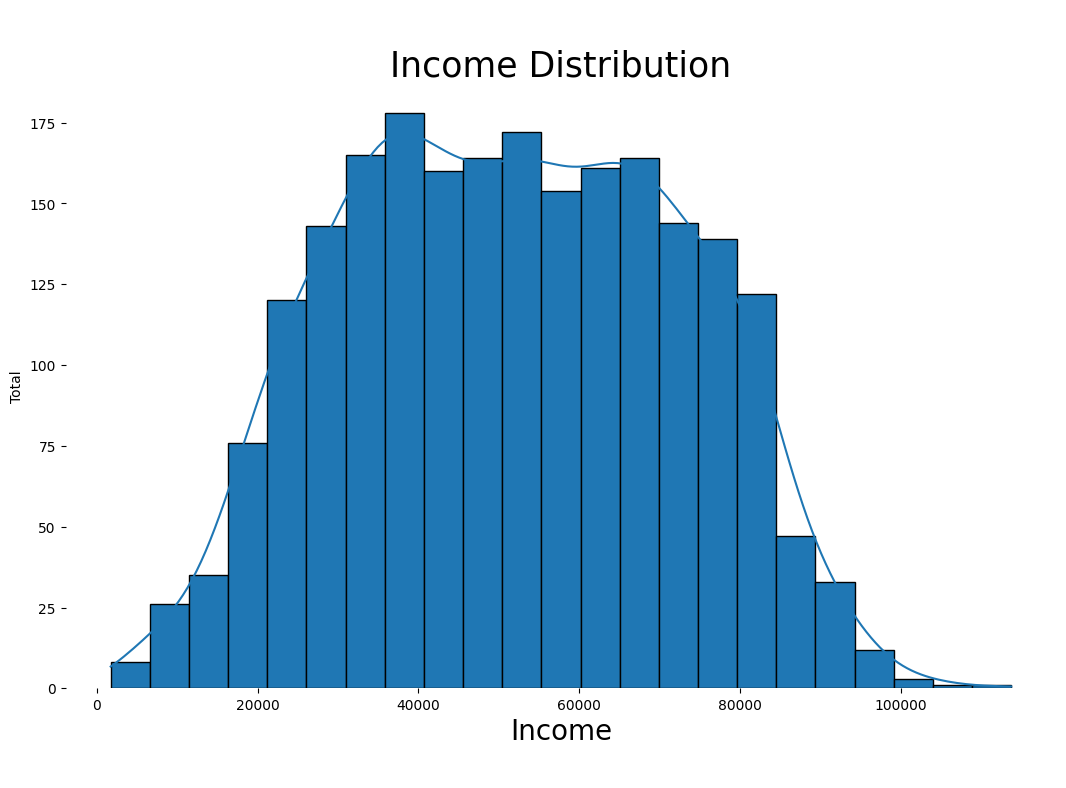

In [38]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(df['Income'], kde=True, bins='auto', alpha=1, fill=True)
ax.set_title('\nIncome Distribution', fontsize=25)
ax.set_xlabel('Income\n', fontsize=20)
ax.set_ylabel('Total')


sns.despine(left=True, bottom=True)
plt.show()

The income is normally distributed.

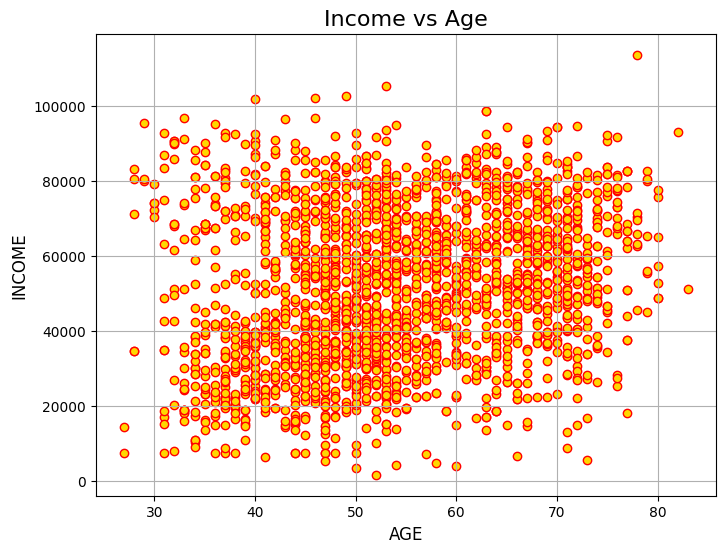

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], color='gold', edgecolors='red')
plt.title('Income vs Age', fontsize=16)
plt.xlabel('AGE', fontsize=12)
plt.ylabel('INCOME', fontsize=12)
plt.grid(True)
plt.show()

Text(0.5, 0.5, 'Total Spending')

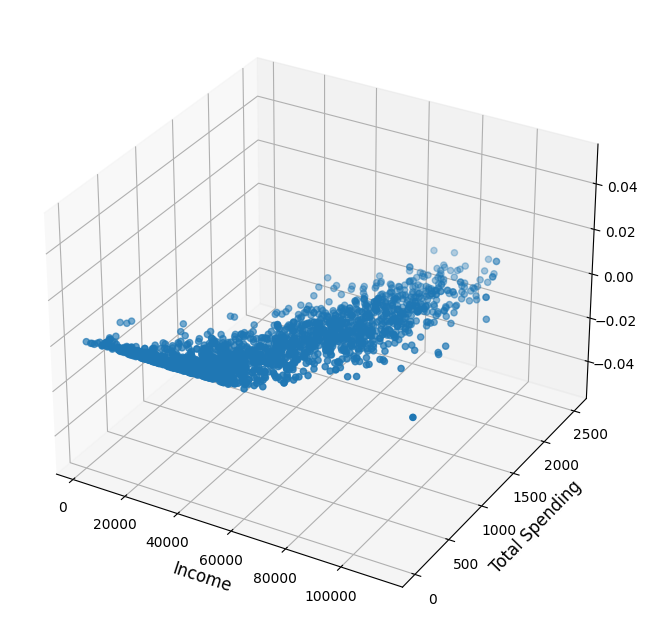

In [40]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Income'], df['Total Spending'])
ax.set_xlabel('Income', fontsize = 12)
ax.set_ylabel('Total Spending', fontsize = 12)

As income increases, there is a corresponding increase in total spending.

#### Label encoding categorical features : 

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2228 non-null   object  
 1   Marital_Status        2228 non-null   object  
 2   Income                2228 non-null   float64 
 3   Kidhome               2228 non-null   int64   
 4   Teenhome              2228 non-null   int64   
 5   NumWebVisitsMonth     2228 non-null   int64   
 6   Complain              2228 non-null   int64   
 7   Days_since_enrolment  2228 non-null   int64   
 8   Age                   2228 non-null   int64   
 9   Total Spending        2228 non-null   int64   
 10  Prob_wines            2228 non-null   float64 
 11  Prob_fruits           2228 non-null   float64 
 12  Prob_meatproducts     2228 non-null   float64 
 13  Prob_fishproducts     2228 non-null   float64 
 14  Prob_sweetproducts    2228 non-null   float64 
 15  Prop_gold

#### Label Encoding : 

In [43]:
le = LabelEncoder()

df1 = df.copy()

columns = ['Education', 'Marital_Status']

for column in columns: 
   df1[column] = le.fit_transform(df1[column])

In [44]:
df1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,NumWebVisitsMonth,Complain,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases,Age_group
0,2,4,58138.0,0,0,7,0,663,66,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1,25,61-70
1,2,4,46344.0,1,1,5,0,113,69,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,6,61-70
2,2,5,71613.0,0,0,4,0,312,58,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,21,51-60
3,2,5,26646.0,1,0,6,0,139,39,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,8,31-40
4,4,3,58293.0,1,0,5,0,161,42,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,19,41-50


#### Scaling the data using standard scaler : 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2228 non-null   object  
 1   Marital_Status        2228 non-null   object  
 2   Income                2228 non-null   float64 
 3   Kidhome               2228 non-null   int64   
 4   Teenhome              2228 non-null   int64   
 5   NumWebVisitsMonth     2228 non-null   int64   
 6   Complain              2228 non-null   int64   
 7   Days_since_enrolment  2228 non-null   int64   
 8   Age                   2228 non-null   int64   
 9   Total Spending        2228 non-null   int64   
 10  Prob_wines            2228 non-null   float64 
 11  Prob_fruits           2228 non-null   float64 
 12  Prob_meatproducts     2228 non-null   float64 
 13  Prob_fishproducts     2228 non-null   float64 
 14  Prob_sweetproducts    2228 non-null   float64 
 15  Prop_gold

In [46]:
df1 = df1.drop('Complain', axis = 1)

In [47]:
df1['Children'] = df['Kidhome'] + df['Teenhome']

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
df2 = df1.copy()
df2.drop('Age_group', axis=1, inplace=True)

scaler = StandardScaler()

scaled = scaler.fit_transform(df2)


In [50]:
scaled

array([[-0.34986559,  0.25121927,  0.31495474, ...,  0.61782568,
         1.33489124, -1.26596502],
       [-0.34986559,  0.25121927, -0.25821825, ..., -0.50311538,
        -1.16549   ,  1.39369558],
       [-0.34986559,  1.18098095,  0.96982214, ..., -0.50311538,
         0.80849519, -1.26596502],
       ...,
       [-0.34986559, -1.60830409,  0.25872605, ...,  0.61782568,
         0.54529717, -1.26596502],
       [ 0.54099217,  1.18098095,  0.85474044, ..., -0.50311538,
         1.07169322,  0.06386528],
       [ 1.43184993, -0.67854241,  0.05888823, ...,  0.61782568,
        -0.50749494,  1.39369558]])

In [51]:
df_scaled = pd.DataFrame(scaled, columns=df2.columns)

In [52]:
df_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,NumWebVisitsMonth,Days_since_enrolment,Age,Total Spending,Prob_wines,Prob_fruits,Prob_meatproducts,Prob_fishproducts,Prob_sweetproducts,Prop_goldprods,Offers_Responded_To,Total Purchases,Children
0,-0.349866,0.251219,0.314955,-0.825141,-0.932066,0.689458,1.529621,1.015269,1.685034,-0.293624,0.089278,0.726089,0.448346,0.058145,-0.604509,0.617826,1.334891,-1.265965
1,-0.349866,0.251219,-0.258218,1.031843,0.904047,-0.139305,-1.190315,1.271560,-0.962496,-0.229058,-0.222638,-0.212360,0.033295,-0.225926,0.935552,-0.503115,-1.165490,1.393696
2,-0.349866,1.180981,0.969822,-0.825141,-0.932066,-0.553687,-0.206193,0.331828,0.284674,0.392511,0.245777,-0.688432,0.919631,-0.388922,-0.607245,-0.503115,0.808495,-1.265965
3,-0.349866,1.180981,-1.215515,1.031843,-0.932066,0.275076,-1.061736,-1.291345,-0.919203,-1.106604,0.466954,1.048791,1.506151,0.093799,-0.238146,-0.503115,-0.902292,0.063865
4,1.431850,-0.678542,0.322488,1.031843,-0.932066,-0.139305,-0.952939,-1.035055,-0.304776,-0.217883,0.941052,0.254252,0.482209,0.214345,-0.777759,-0.503115,0.545297,0.063865


#### Dimensionality reduction by PCA : 

Dimensionality Reduction is the method of reducing the number of attributes in the data while retaining its essential information. Its objective is to eliminate redundant or irrelevant features from the dataset, thereby enhancing efficiency.

PCA, on the other hand, is a specific technique employed for conducting dimensionality reduction. It does so by identifying new variables, known as principal components, which encapsulate the most crucial information and patterns present in the data.

In [53]:
from sklearn.decomposition import PCA 

In [54]:
pca = PCA()

pca.fit(df_scaled)

PCA()

#### Plotting cumulative variance ratio and find a suitable number of PCs : 

In [55]:
pca.n_components_

18

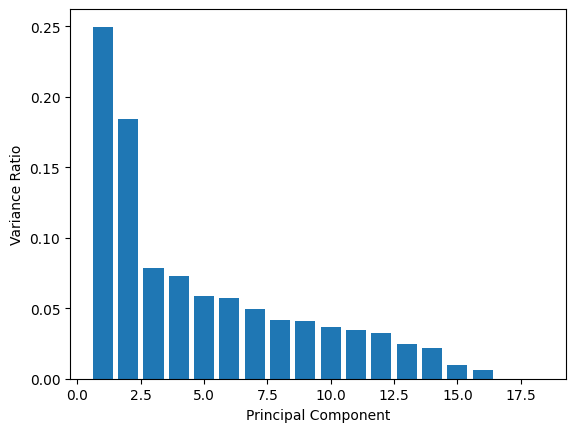

In [56]:
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

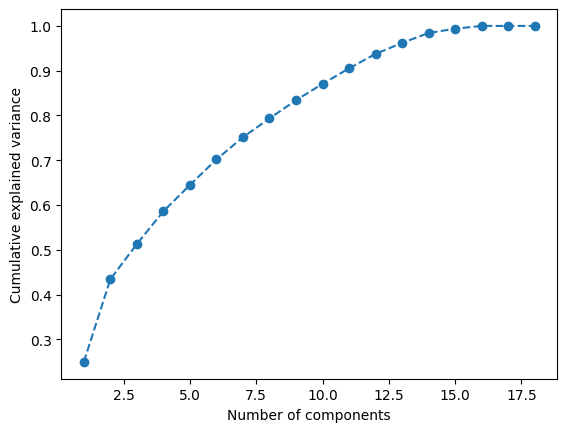

In [57]:
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

it is recommended that the total variance explained by all components should be between 70% and 80%, hence : We need 9 components.

In [58]:
d = np.argmax(np.cumsum(pca.explained_variance_ratio_)>= 0.8) + 1
d

9

In [59]:
pca = PCA(n_components= 9)
pca.fit(df_scaled)

x_pca = pca.transform(df_scaled)
x_pca = pd.DataFrame(x_pca, columns=['D1','D2','D3','D4','D5','D6','D7','D8','D9'])
x_pca

,D1,D2,D3,D4,D5,D6,D7,D8,D9
0,-1.850388,-1.655304,0.989375,-1.430355,0.917517,-0.688341,-0.917542,0.679068,-0.408030
1,1.688165,1.530634,-0.163821,1.749269,0.059520,-0.132314,0.931725,0.949842,-0.602727
2,-1.443501,-1.174530,0.436348,0.612234,-0.444434,-1.356450,-0.344937,-1.167474,-0.416819
3,2.521240,-1.295770,-1.710548,0.396358,0.596287,-0.921793,0.313653,-0.979375,-0.301927
4,0.267004,-0.565509,-1.463022,0.273119,0.024281,1.022144,-0.546259,-0.760173,0.944937
...,...,...,...,...,...,...,...,...,...
2223,-0.920748,0.276263,1.524343,0.312260,-0.369245,0.743583,0.097317,-0.174901,0.237876
2224,-0.754521,4.666820,-0.682072,0.822865,0.360455,-0.372199,1.927157,0.574812,0.683380
2225,-1.784883,-0.419564,-0.597717,-0.907624,-1.715392,1.482312,-0.233053,-1.248155,-0.151942
2226,-1.815951,0.343840,0.267840,1.892433,0.384014,-0.985058,0.187197,-0.083858,-0.186247


Plotting PCA with 3 components : 

In [60]:
def scatter_3d(x,y,z):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,y,z,c='green', marker = 'o')
    ax.set_title('The plot of the clusters')
    plt.show()

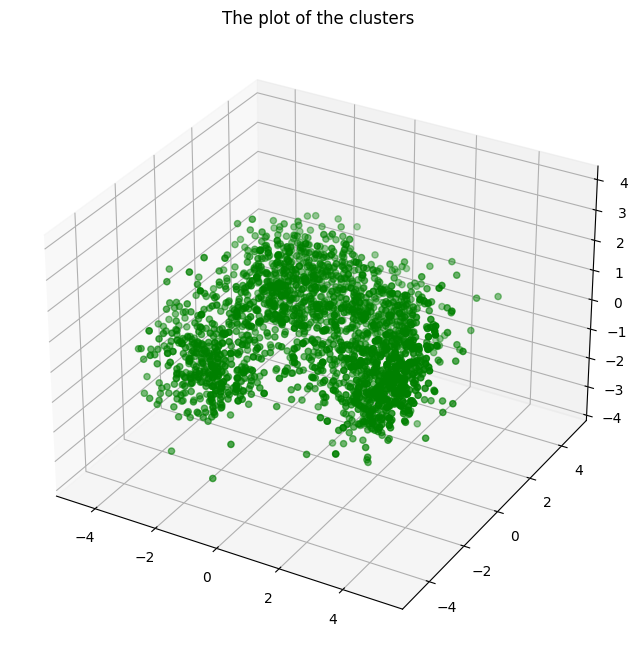

In [61]:
scatter_3d(x_pca['D1'],x_pca['D2'],x_pca['D3'])

### Clustering :

#### Clustering is a machine learning technique used to group similar data points together based on their characteristics or proximity. It aims to find natural groupings or clusters in the data without prior knowledge of the class labels. The goal is to discover inherent patterns or structures within the data.

#### in order to determine the best number of clusters to create, we will use the elbow method : 

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

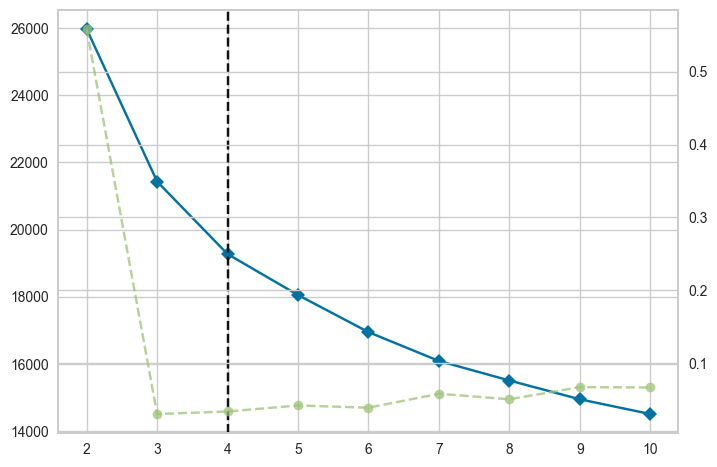

In [62]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(x_pca)
plt.show()

The above analysis shows that 4 clusters are the optimal number for the data.

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

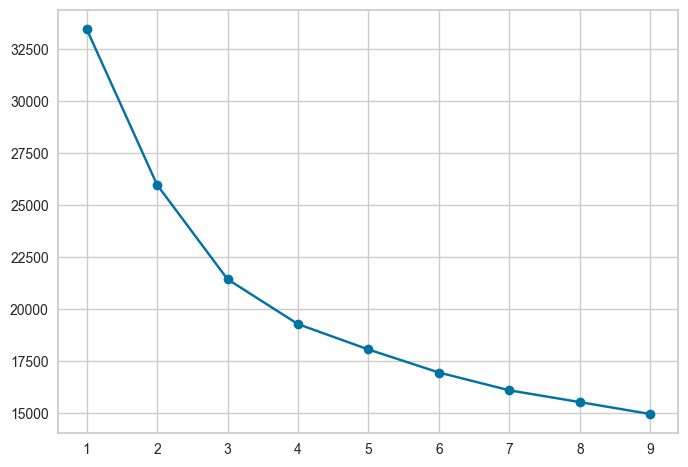

In [63]:
iner = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters= i , random_state= 1)
    kmeans.fit(x_pca)
    iner.append(kmeans.inertia_)
plt.plot(range(1, 10), iner, marker = 'o')    

In [64]:
kmeans = KMeans(n_clusters=4)
pred = kmeans.fit_predict(x_pca)
x_pca['Cluster'] = pred

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [65]:
x_pca['Cluster'].value_counts()

Cluster
0    680
1    593
3    529
2    426
Name: count, dtype: int64

In [66]:
x_pca.columns

Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'Cluster'], dtype='object')

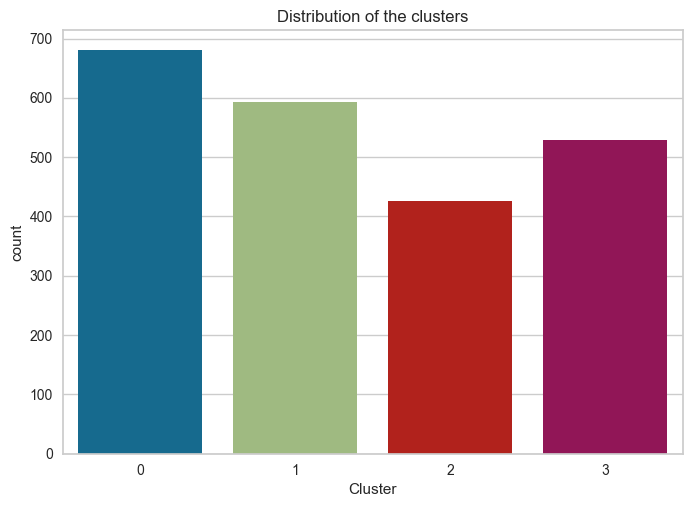

In [67]:
sns.countplot(x=x_pca['Cluster'])
plt.title('Distribution of the clusters')
plt.show()

In [68]:
df['Cluster'] = pred

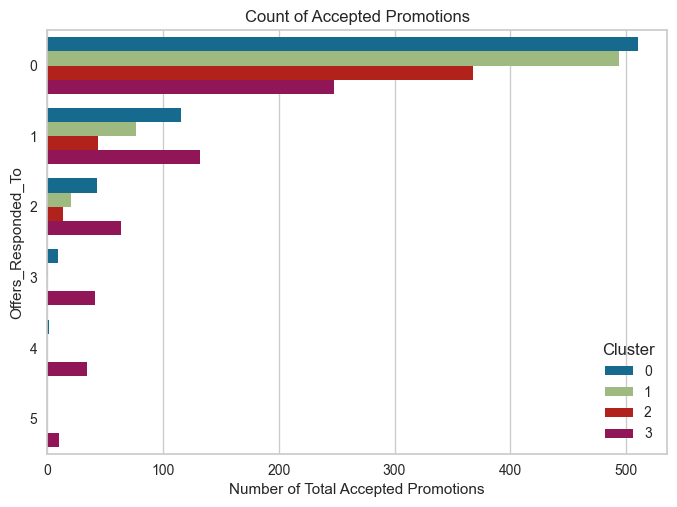

In [69]:
sns.countplot(data=df, y='Offers_Responded_To', hue='Cluster')
plt.title('Count of Accepted Promotions')
plt.xlabel('Number of Total Accepted Promotions')
plt.show()

It appears that promotions and campaigns have a limited impact on customer spending patterns.

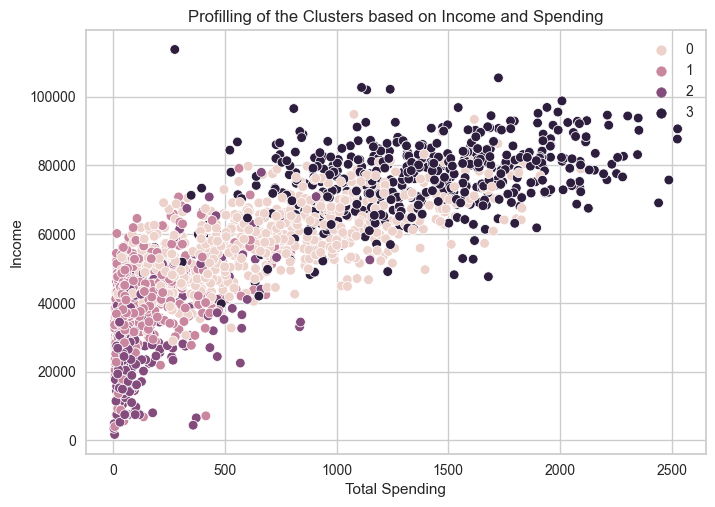

In [79]:
# Profilling culsters based on Income and Spending
sns.scatterplot(data=df, x='Total Spending', y='Income', hue='Cluster')
plt.title('Profilling of the Clusters based on Income and Spending')
plt.legend()
plt.show()

Income and total spending exhibit a robust correlation. The clusters provide concise insights into their respective patterns:

Group 0 : low spending average income => Careful Spenders customers.
Group 1 : high spending high income. => elite customers
Group 2 : low spending low income => Budget-conscious customers
Group 3 : medium spending average income. => Regular Customers


In [80]:
re_clust = {
    0: 'Regular Customer',
    1: 'Careful Spenders Customer',
    2: 'Budget-conscious Customer',
    3: 'Elite Customer'}
df['Clusters_Customers'] = df['Cluster'].map(re_clust)

In [81]:
df2['Cluster'] = pred
df2['Clusters_Customers'] = df['Cluster'].map(re_clust)

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2228 non-null   int32  
 1   Marital_Status        2228 non-null   int32  
 2   Income                2228 non-null   float64
 3   Kidhome               2228 non-null   int64  
 4   Teenhome              2228 non-null   int64  
 5   NumWebVisitsMonth     2228 non-null   int64  
 6   Days_since_enrolment  2228 non-null   int64  
 7   Age                   2228 non-null   int64  
 8   Total Spending        2228 non-null   int64  
 9   Prob_wines            2228 non-null   float64
 10  Prob_fruits           2228 non-null   float64
 11  Prob_meatproducts     2228 non-null   float64
 12  Prob_fishproducts     2228 non-null   float64
 13  Prob_sweetproducts    2228 non-null   float64
 14  Prop_goldprods        2228 non-null   float64
 15  Offers_Responded_To   2228

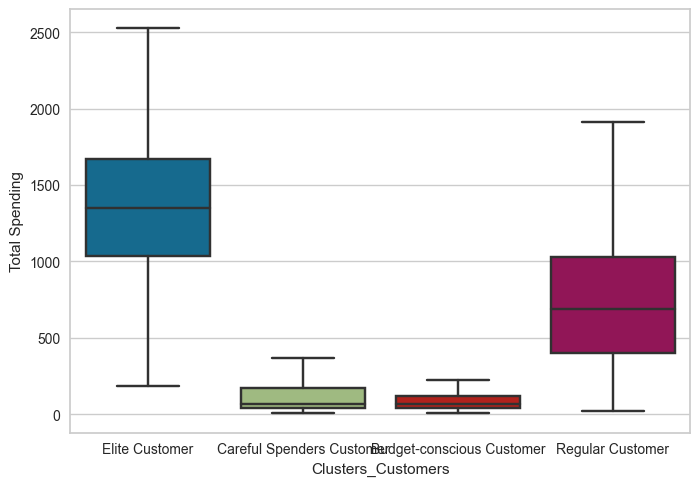

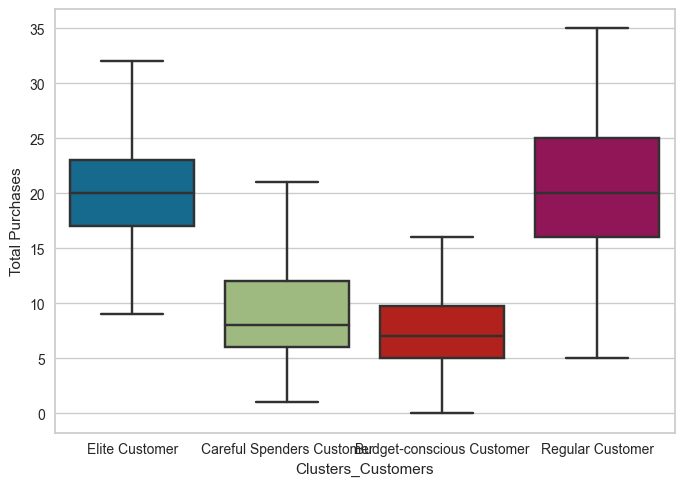

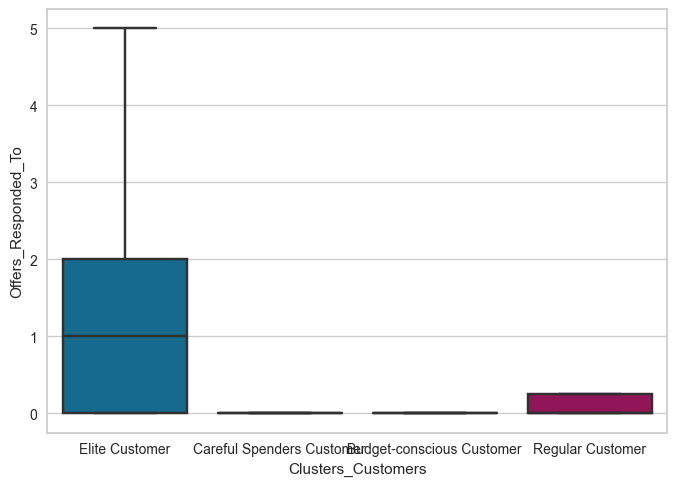

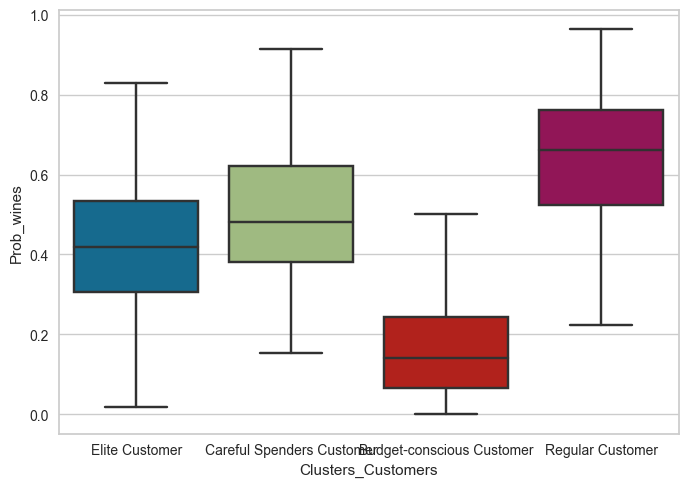

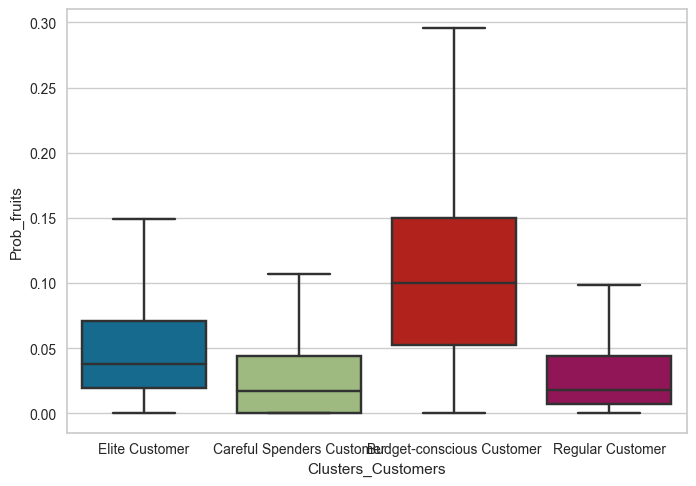

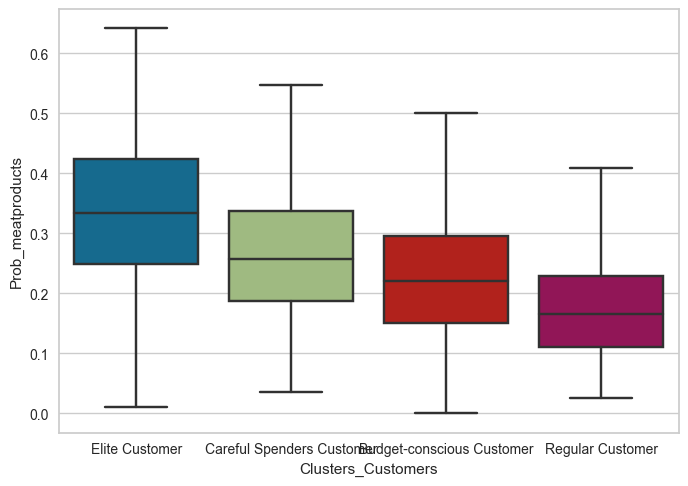

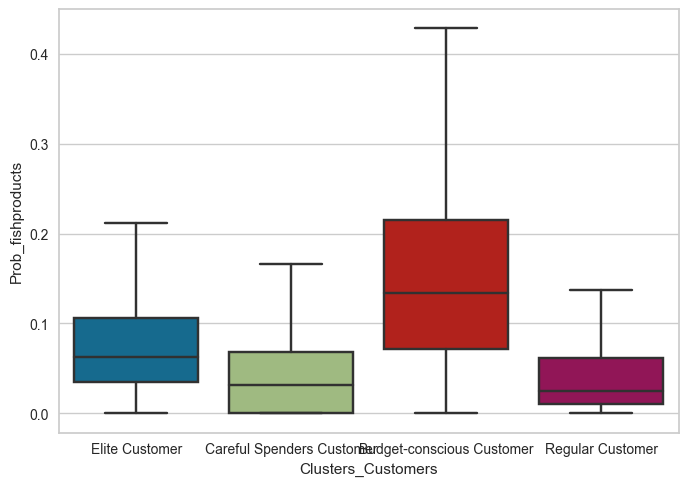

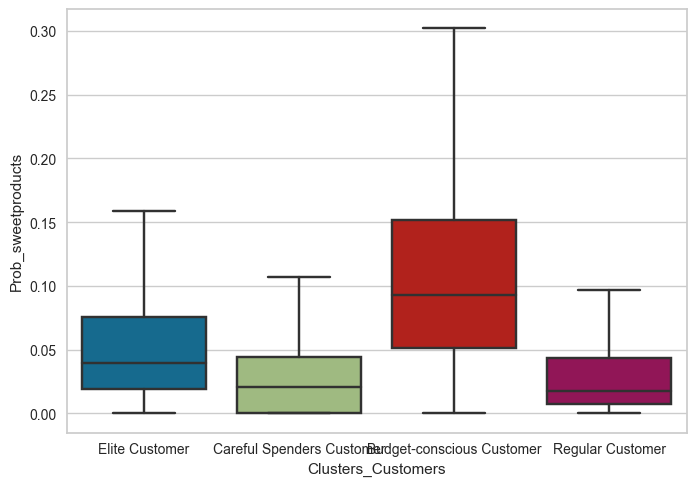

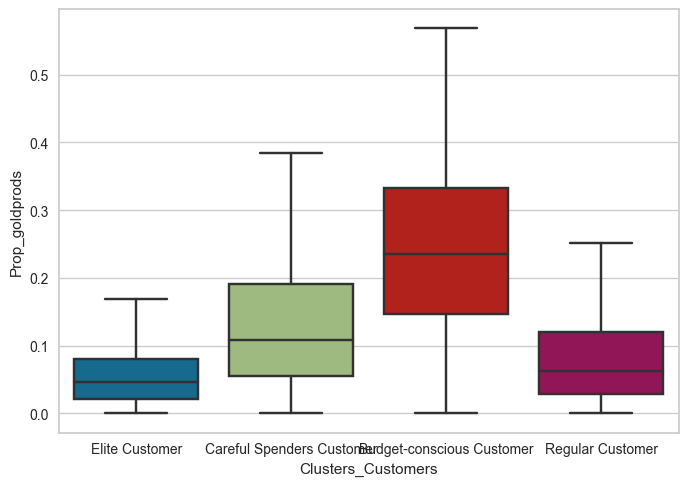

In [83]:
for col in ['Total Spending','Total Purchases','Offers_Responded_To', 'Prob_wines', 'Prob_fruits', 'Prob_meatproducts','Prob_fishproducts', 'Prob_sweetproducts', 'Prop_goldprods'] :
    sns.boxplot(data=df, x='Clusters_Customers', y=col, showfliers=False)
    plt.show()

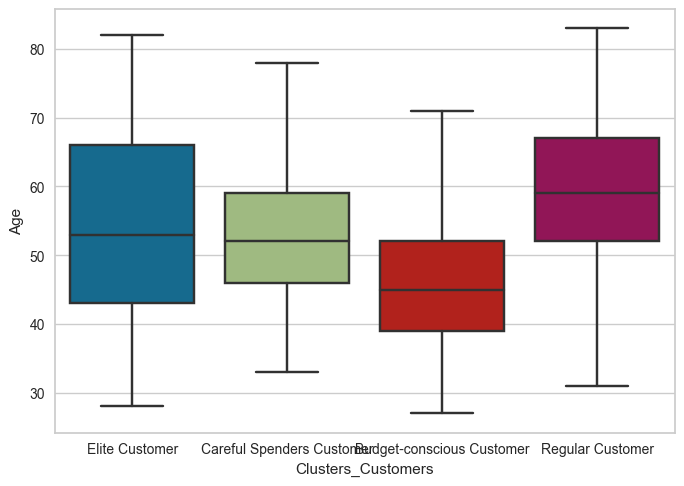

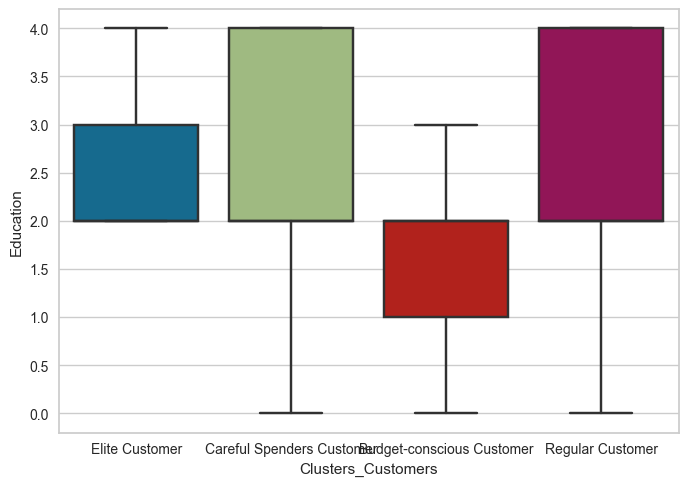

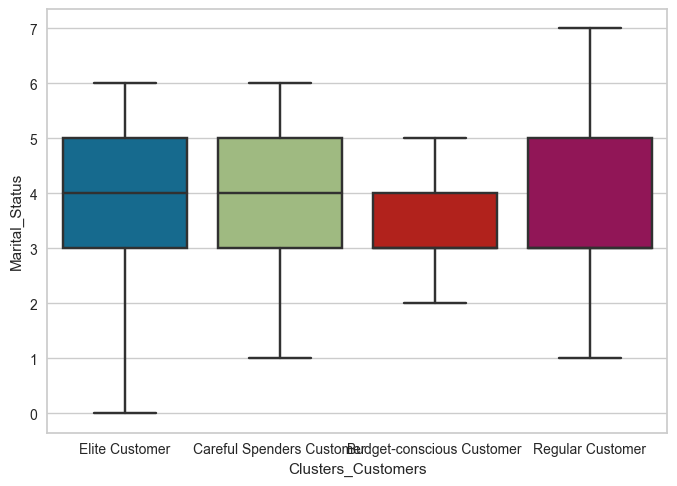

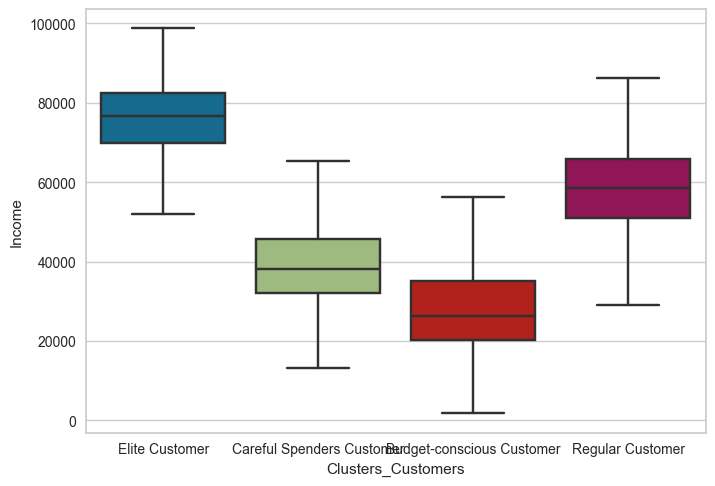

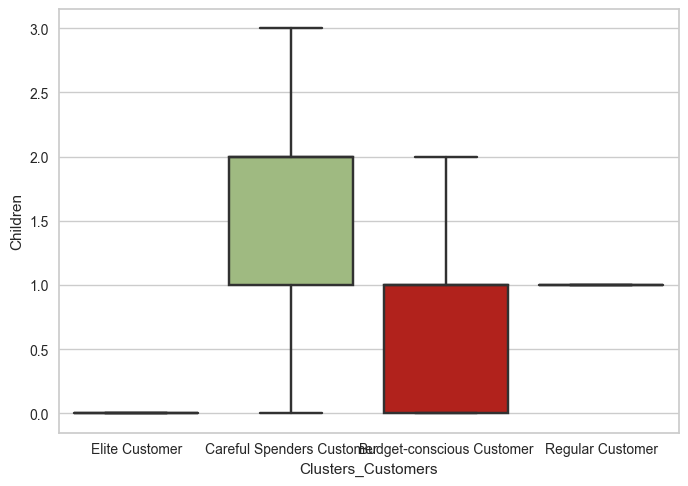

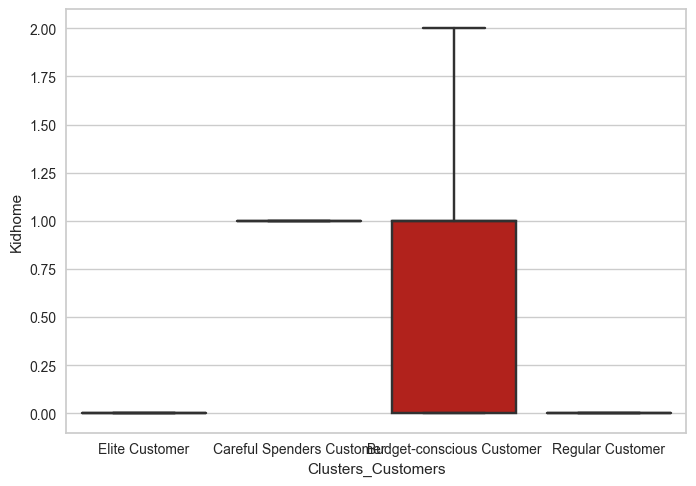

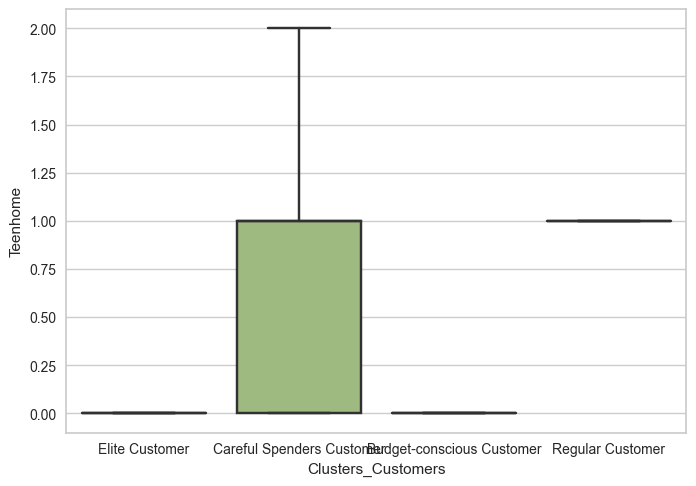

In [84]:
for col in ['Age','Education','Marital_Status','Income', 'Children','Kidhome','Teenhome']:
    sns.boxplot(data=df2, x='Clusters_Customers', y=col, showfliers=False)
    plt.show()

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarnin

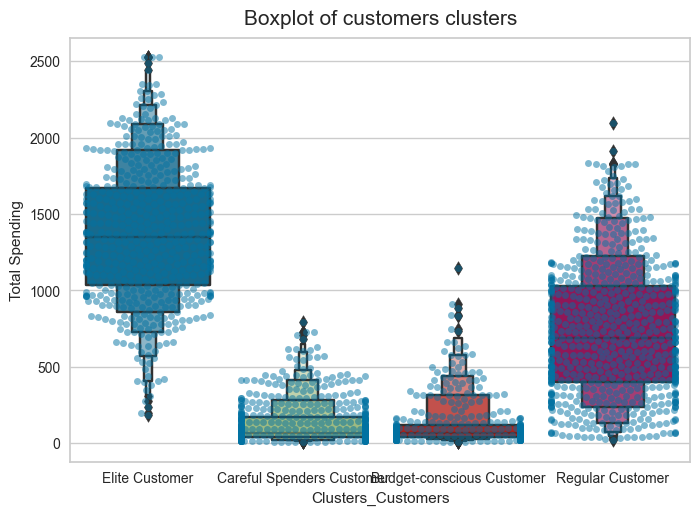

In [85]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters_Customers"], y=df["Total Spending"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters_Customers"], y=df["Total Spending"])
pl.set_title("Boxplot of customers clusters", pad=10, size=15)
plt.show()

The box plot reveals a clear distinction in spending behavior. Elite and Good customers show notably higher expenditures.in contrast to Ordinary and good customers, whose spending hovers around 500. 

1 - 
1. A significant portion of customers falls within the age group of over 31 years, prompting a focus on the five age groups surpassing 30 years.

2. The presence of married individuals across all age groups is prominent. Additionally, there is a notable proportion of the population in single or non-marital relationships.

3. Individuals aged 51 and above tend to have teenagers residing in their households, while younger individuals are more likely to have children under the age of 13 living with them.

4. A majority of individuals in the five age groups have completed their education, with a small number having basic education.

5. The majority of customers hold graduate, PHD, and master's degrees.

6. Promotions and campaigns show limited impact on customer spending patterns.

7. Income and total spending exhibit a strong correlation. The clusters offer concise insights into their respective spending patterns.

2 - 
1. Elite Customers:

- Age: Generally older, around 50 years old.
- Income: High income, significant purchasing power.
- Family: Less likely to have children compared to other clusters.
- Education: Typically well-educated, leaning more towards medium levels.
- Spending Behavior: They tend to spend the most with the company.
- Preferred Products: Primarily inclined towards purchasing meat and wine products.
- Response to Offers and purchases : They are more likely to make purchases and respond favorably to offers.

2. Budget-conscious Customers:

- Age: Typically older, around 45 years old.
- Income: Generally lower income.
- Family: More likely to be married or in a long-term relationship. Children are more likely to be in the younger age group (kids rather than teens).
- Education: Usually educated.
- Spending Behavior: They do not exhibit high 
 spending habits with the company.
- Preferred Products: They tend to purchase meat and gold products.
- Response to Offers and purchases : They are less likely to make purchases and show a lower likelihood to respond to offers.

3. Careful spenders Customers:

- Age: Around 52 years old, relatively older.
Income: Enjoy a higher income compared to other groups.
- Family: More likely to be married or in a long-term relationship. They are most likely to have 1 or 2 children, with a higher likelihood of having a teen at home.
- Education: Generally possess higher levels of education.
- Spending Behavior: They do not exhibit high spending habits with the company.
- Preferred Products: They tend to purchase mostly wines and meat products.
- Response to Offers and purchases : They are not highly inclined to make purchases and are less likely to respond to offers.

4. Regular Customers:

- Age: Older, around 57 years old, but on the younger side of the clusters.
- Income: Enjoy a medium level of income.
- Family: More likely to be married or in a long-term relationship. They do not have children or teenagers at home.
- Education: Typically highly educated.
- Spending Behavior: They are known to spend significantly with the company.
- Preferred Products: They primarily purchase wine and meat products.
- Response to Offers and purchases : They actively make purchases during deals and are highly responsive to offers.
